# Aim: Identify gender based on data pertaining to measurement of facial features

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Import the data
gc = pd.read_csv("gender_classification_v7.csv")
# top 5 records of dataframe
gc.head()  

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

In [3]:
# Information of data
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
# Distribution of data
gc.describe()

long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%       0.000000     0.000000                   0.000000  
50%       1.000000     0.000000                   0.000000  
75%       1.000000     1.000000                   1.000000  
max       1.000000     1.000000                   1.000000

In [5]:
# count of null values across the columns
gc.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
# Gives the number of rows and columns in (r,c)
gc.shape    

(5001, 8)

In [7]:
# number of values for each column
gc.count()  

long_hair                    5001
forehead_width_cm            5001
forehead_height_cm           5001
nose_wide                    5001
nose_long                    5001
lips_thin                    5001
distance_nose_to_lip_long    5001
gender                       5001
dtype: int64

# EDA

Female    2501
Male      2500
Name: gender, dtype: int64


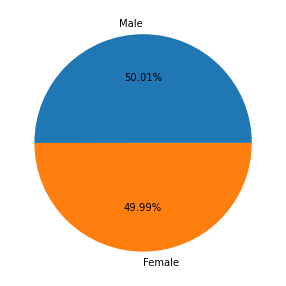

In [8]:
#Visualize total count of each gender 
a, b = gc['gender'].value_counts()
plt.figure(figsize = (13,5))
plt.pie([a, b], labels=["Male", "Female"], autopct="%.2f%%")
print(gc["gender"].value_counts())


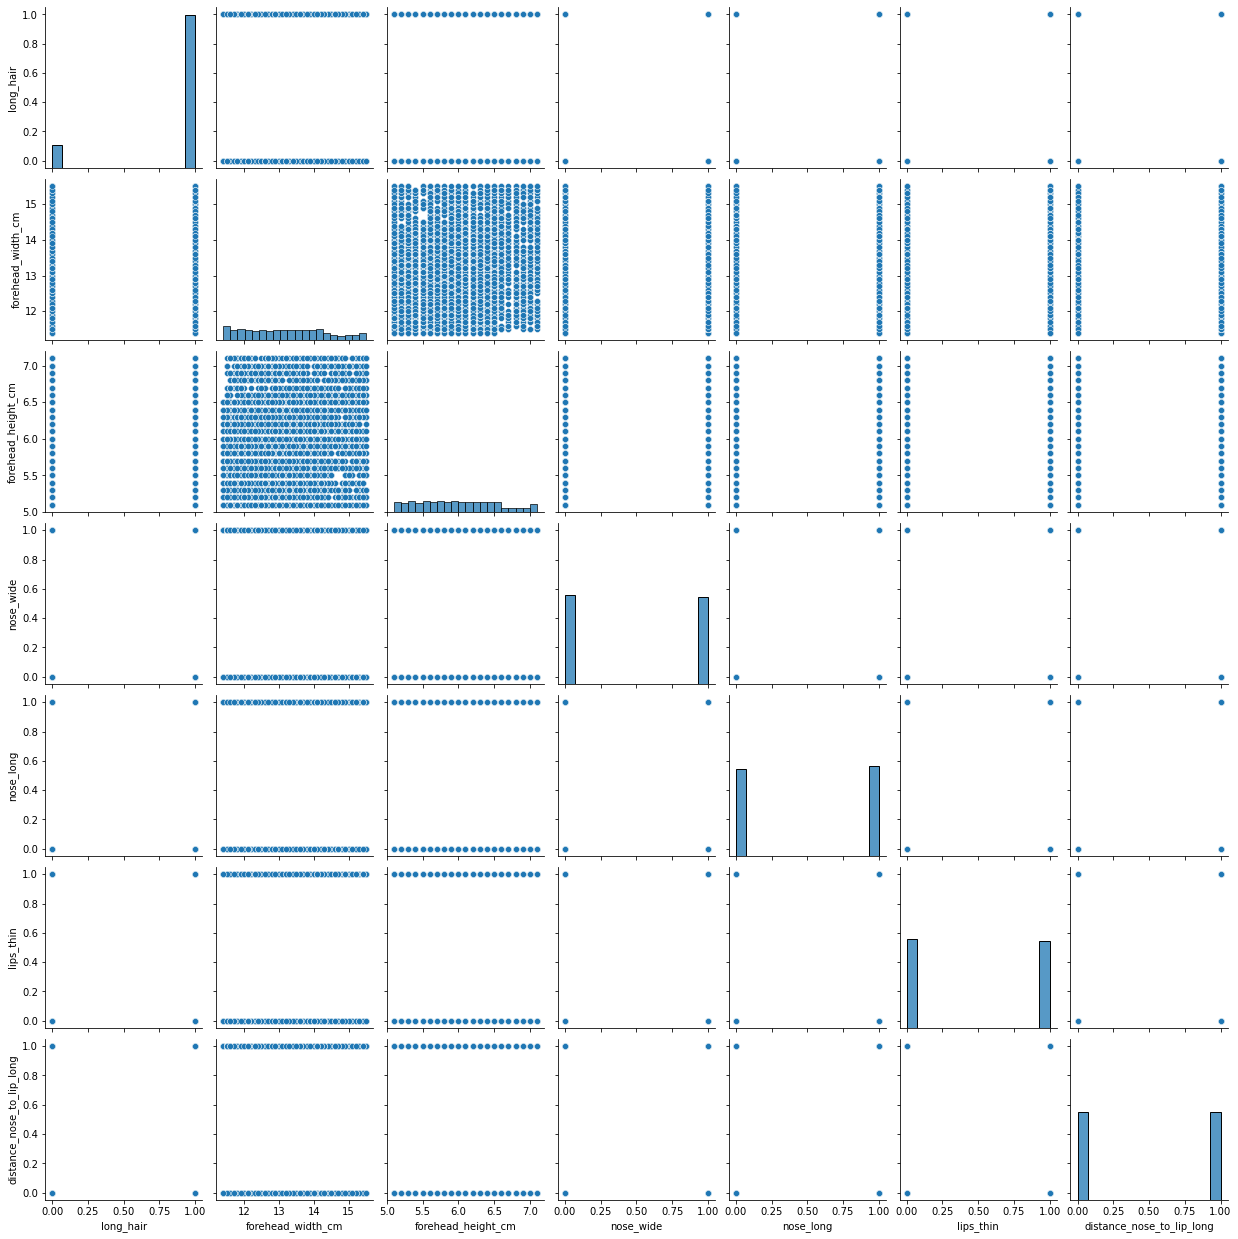

In [9]:
sns.pairplot(gc)

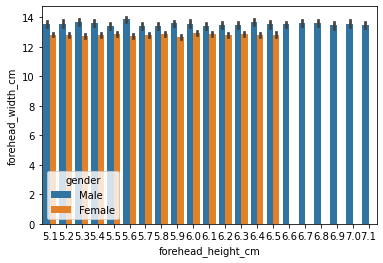

In [10]:
# display forehead_height and forehead_width of male and female
ax = sns.barplot(x="forehead_height_cm", y="forehead_width_cm", hue="gender", data=gc)

<AxesSubplot:xlabel='gender', ylabel='lips_thin'>

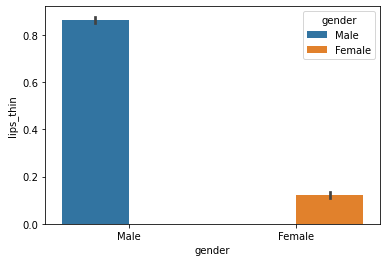

In [11]:
sns.barplot(x="gender", y="lips_thin", hue="gender", data=gc)

<AxesSubplot:xlabel='gender', ylabel='nose_long'>

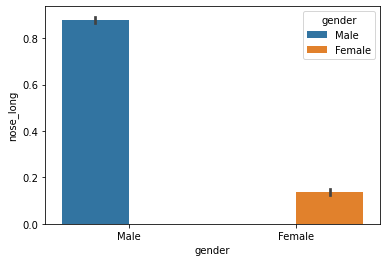

In [6]:
sns.barplot(x="gender", y="nose_long", hue="gender", data=gc)

<AxesSubplot:xlabel='gender', ylabel='nose_wide'>

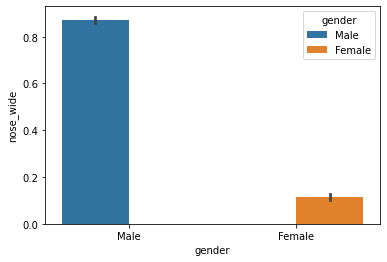

In [8]:
sns.barplot(x="gender", y="nose_wide", hue="gender", data=gc)

<AxesSubplot:xlabel='gender', ylabel='distance_nose_to_lip_long'>

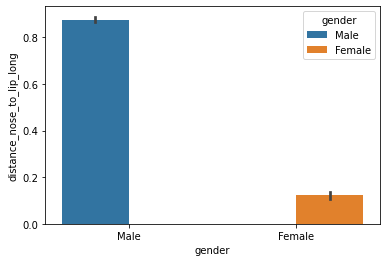

In [9]:
sns.barplot(x="gender", y="distance_nose_to_lip_long", hue="gender", data=gc)

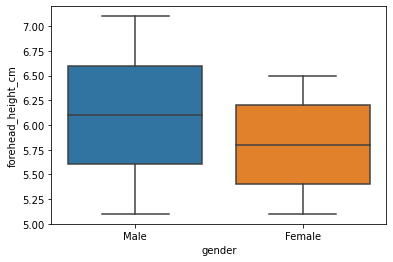

In [11]:
# boxplot to find the min, median and max range of forehead_height
ax = sns.boxplot(x="gender", y="forehead_height_cm", data=gc)

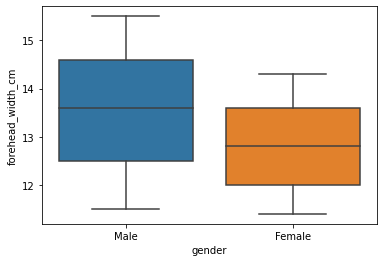

In [13]:
# boxplot to find the min, median and max range of forehead_width
ax = sns.boxplot(x="gender", y="forehead_width_cm", data=gc)

array([[<AxesSubplot:title={'center':'long_hair'}>,
        <AxesSubplot:title={'center':'forehead_width_cm'}>,
        <AxesSubplot:title={'center':'forehead_height_cm'}>],
       [<AxesSubplot:title={'center':'nose_wide'}>,
        <AxesSubplot:title={'center':'nose_long'}>,
        <AxesSubplot:title={'center':'lips_thin'}>],
       [<AxesSubplot:title={'center':'distance_nose_to_lip_long'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

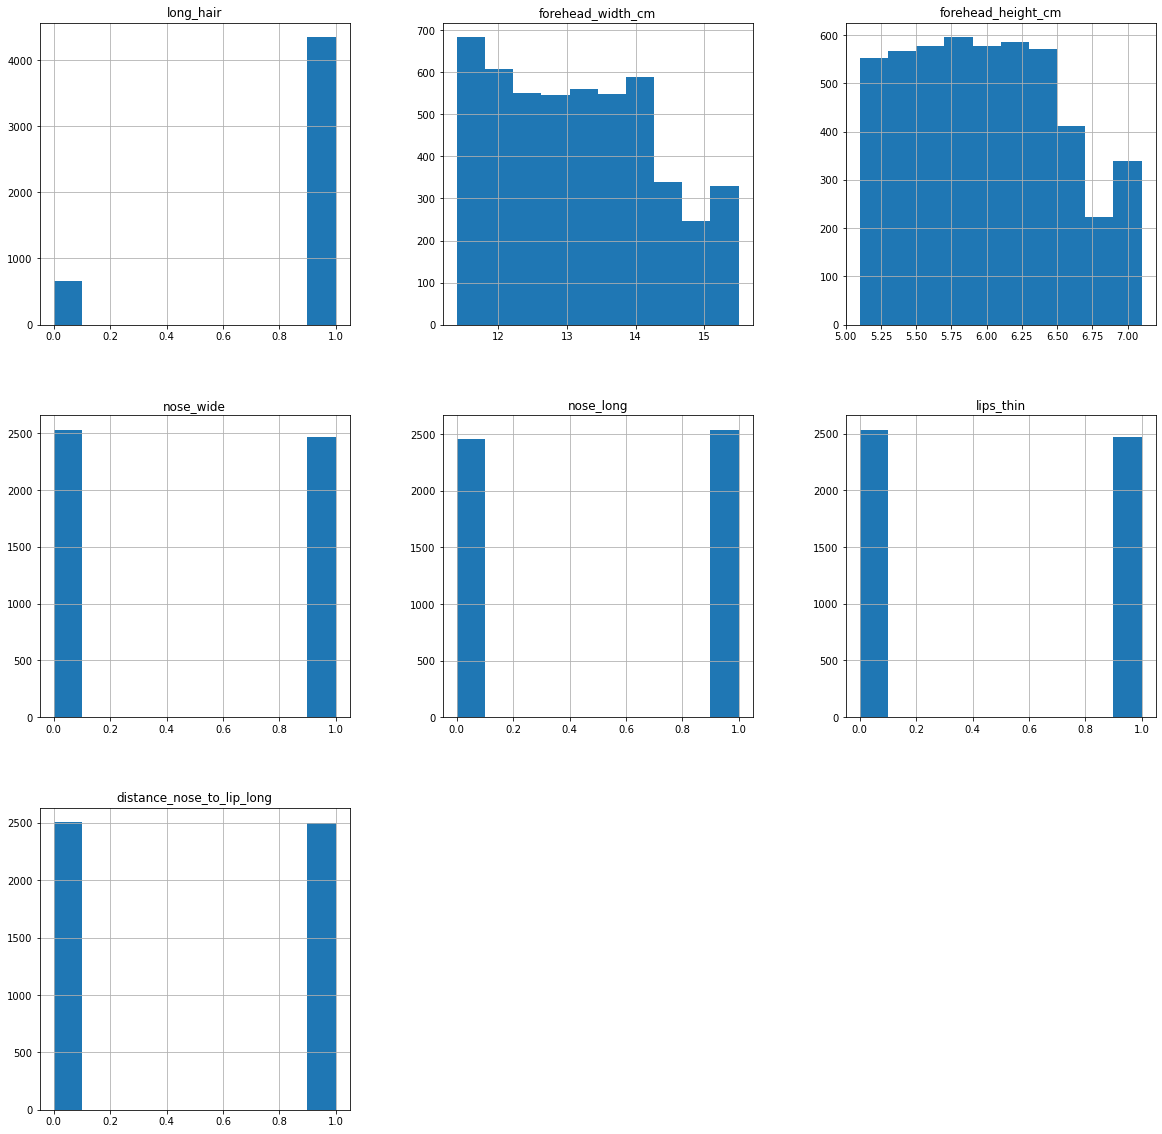

In [17]:
gc.hist(figsize = (20,20))

**Data Preperation**


In [12]:
#Target attribute is y and predictor attribute is x.
#Target attribute is 'gender'

# predictor attribute
X = gc.iloc[:,:-1].values
# target attribute
y = gc.iloc[:,-1].values        

In [13]:
y

array(['Male', 'Female', 'Male', ..., 'Female', 'Female', 'Male'],
      dtype=object)

**Encoding the categorical data**

The datatype of the target attribute is categorical data, the LabelEncoder will convert each class to the following values
-  male= 1 
-  female= 0

In [14]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
Labelencoder_y= LabelEncoder()
y= Labelencoder_y.fit_transform(y)

y

array([1, 0, 1, ..., 0, 0, 1])

**Split the dataset for test and train**

In [15]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.15, random_state=0)

In [16]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

# KNN

**Building KNN Model**

In [17]:
# import the kNN model from scikit learn
from sklearn.neighbors import KNeighborsClassifier

**Initialize the KNN model**

In this step, we initialize the KNN model. We will set K as 5. The nearest neighbor metric = Euclidean distance with power 2. 

In [18]:
# initializing the model
knn= KNeighborsClassifier(n_neighbors=5 , metric= 'minkowski', p=2)  

**Fitting the KNN Model**

In [19]:
#fit the KNN  Model
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Making a Prediction**

In this part, we make a prediction of our test set dataset.


In [20]:
# Predicted the result
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [21]:
# Making  a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[373,  13],
       [ 20, 345]], dtype=int64)

<AxesSubplot:>

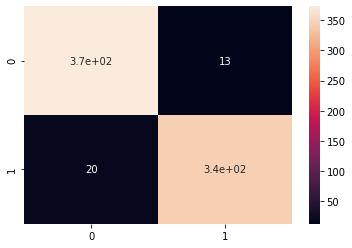

In [22]:
# Visualizing the confusion matrix with a heatmap
sns.heatmap(cm, annot=True)

In [23]:
# check the accuracy score - KNN
from sklearn.metrics import accuracy_score
KNNAccuracy=accuracy_score(y_test, y_pred)
KNNAccuracy*100


95.60585885486019

# Random Forest

**Building Random Forest Model**

In [24]:
# import the random forest classifier from scikit learn
from sklearn.ensemble import RandomForestClassifier

**Initialize the Random Forest model**

In [25]:
#initialize the RF model using Entropy
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

**Fitting the Random Forest Model**

In [26]:
#fit the RF Model
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Making a Prediction**

In this part, we make a prediction of our test set dataset.


In [27]:
# Predict the result
y_pred=RF.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[371,  15],
       [ 16, 349]], dtype=int64)

<AxesSubplot:>

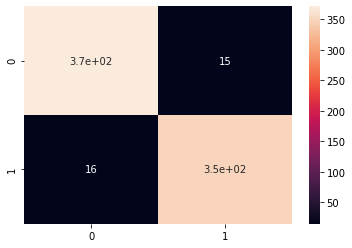

In [29]:
# Visualizing the confusion matrix with a heatmap
sns.heatmap(cm, annot=True)

In [30]:
# check the accuracy score - RF
from sklearn.metrics import accuracy_score
RandForestAccuracy=accuracy_score(y_test, y_pred)
RandForestAccuracy*100

95.87217043941412

# Logistic Regression

In [31]:
# import the Logistic Regression model from scikit learn
from sklearn.linear_model import LogisticRegression

In [32]:
log_reg = LogisticRegression(max_iter = 500) 
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

**Making a Prediction**

In this part, we make a prediction and comparison.

In [33]:
y_pred = log_reg.predict(X_test)

compare_gc = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})
compare_gc.head(10)

Actuals  Predicted
0        0          0
1        1          1
2        1          1
3        0          0
4        0          0
5        0          0
6        0          0
7        1          1
8        0          0
9        0          0

In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

Confusion Matrix = 
 [[367  19]
 [ 13 352]]


<AxesSubplot:>

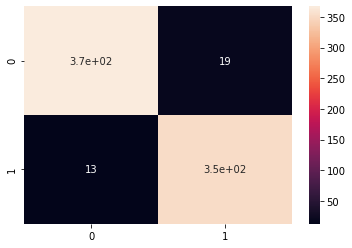

In [35]:
# Visualizing the confusion matrix with a heatmap
sns.heatmap(conf_mat, annot=True)

In [36]:
# check the accuracy score - LR
from sklearn.metrics import accuracy_score
LogisticRegAccuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy = ", str(LogisticRegAccuracy))

Testing Accuracy =  0.9573901464713716


# Support Vector Classifier (Linear Kernel) 

**Building Support Vector Classifier Model**



In [37]:
# import support vector machine from scikit learn
from sklearn.svm import SVC

In [38]:
# initialize the svm model
SVM = SVC(kernel = 'linear')

In [39]:
#fit the SVM Model
SVM.fit(X_train,y_train)

SVC(kernel='linear')

**Making a Prediction**

In this part, we make a prediction of our test set dataset.


In [40]:
# Predicted the result
y_pred= SVM.predict(X_test)
y_pred


array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [41]:
# print the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[366,  20],
       [ 13, 352]], dtype=int64)

<AxesSubplot:>

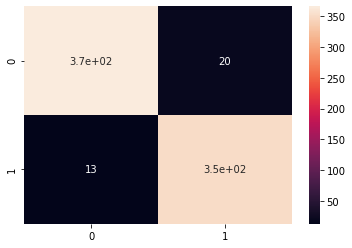

In [42]:
# Visualizing the confusion matrix with a heatmap
sns.heatmap(cm, annot=True)

In [43]:
# check the accuracy score - SVC
from sklearn.metrics import accuracy_score
SVMAccuracy=accuracy_score(y_test, y_pred)
SVMAccuracy*100

95.60585885486019

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score

In [45]:
model = [knn, RF, log_reg, SVM]
for model in model:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(model,'\n', 'Classification_Report:','\n', report, '\n')

KNeighborsClassifier() 
 Classification_Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       386
           1       0.96      0.95      0.95       365

    accuracy                           0.96       751
   macro avg       0.96      0.96      0.96       751
weighted avg       0.96      0.96      0.96       751
 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) 
 Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       386
           1       0.96      0.96      0.96       365

    accuracy                           0.96       751
   macro avg       0.96      0.96      0.96       751
weighted avg       0.96      0.96      0.96       751
 

LogisticRegression(max_iter=500) 
 Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       386
           1       

In [47]:
print(f'K Neighbors Classifier: {round(100*KNNAccuracy, 2)}%\nRandom Forest Classifier: {round(100*RandForestAccuracy, 2)}%\nLogistic Regression: {round(100*LogisticRegAccuracy, 2)}%\nSupport Vector Classifier: {round(100*SVMAccuracy, 2)}%')

K Neighbors Classifier: 95.61%
Random Forest Classifier: 95.87%
Logistic Regression: 95.74%
Support Vector Classifier: 95.61%
